In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [2]:
# Load dataset
try:
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Error loading dataset: {e}")

Dataset loaded successfully.


In [3]:
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [4]:
# Check data types and missing values
print("\nDataset info:")
print(df.info())

print("\nMissing values in each column:")
print(df.isnull().sum())

# Clean missing values (if any)
df.dropna(inplace=True)


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None

Missing values in each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [5]:
# Basic statistics
print("\nBasic statistics:")
print(df.describe())

# Group by species and compute mean
grouped = df.groupby('species').mean()
print("\nMean values grouped by species:")
print(grouped)

# Interesting patterns
print("\nObservations:")
for column in iris.feature_names:
    max_species = grouped[column].idxmax()
    print(f"  {max_species} has the highest average {column}")


Basic statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  

Mean values grouped by species:
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                   

<ipython-input-5-da800684043d>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('species').mean()


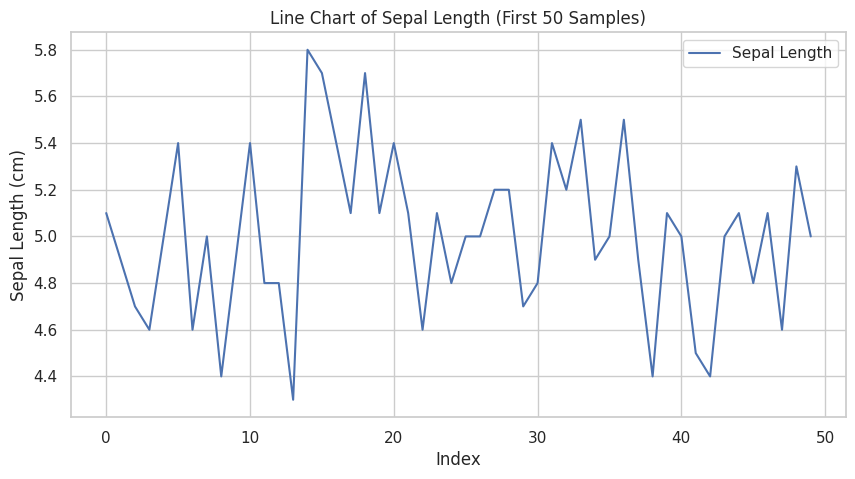

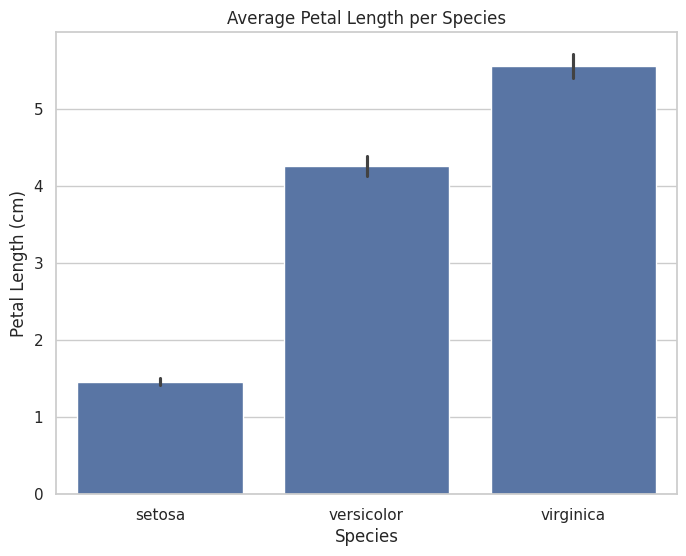

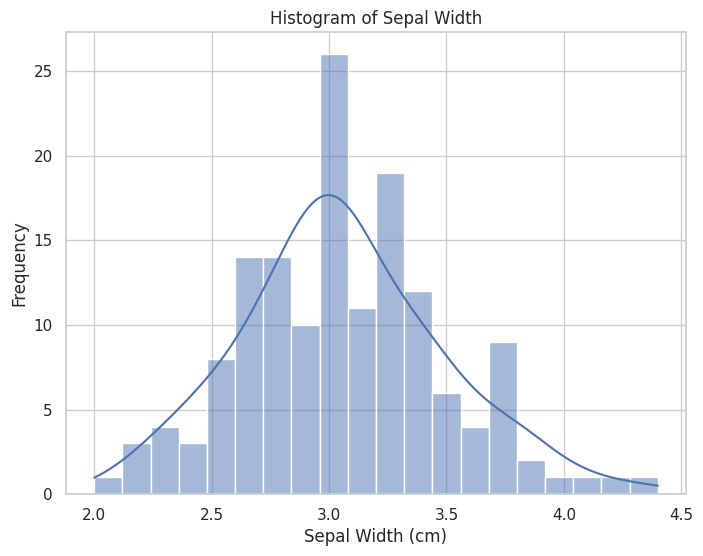

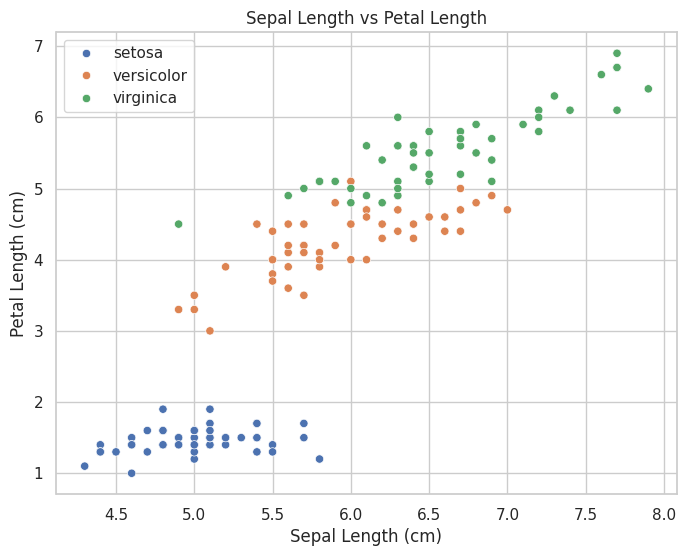

In [6]:
#data visualisation
# Set seaborn style
sns.set(style="whitegrid")

# Line Chart - Not ideal for this dataset, so simulate time-series with index
plt.figure(figsize=(10, 5))
plt.plot(df.index[:50], df['sepal length (cm)'][:50], label='Sepal Length')
plt.title('Line Chart of Sepal Length (First 50 Samples)')
plt.xlabel('Index')
plt.ylabel('Sepal Length (cm)')
plt.legend()
plt.show()

# Bar Chart - Average petal length per species
plt.figure(figsize=(8, 6))
sns.barplot(x='species', y='petal length (cm)', data=df)
plt.title('Average Petal Length per Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

# Histogram - Sepal Width
plt.figure(figsize=(8, 6))
sns.histplot(df['sepal width (cm)'], bins=20, kde=True)
plt.title('Histogram of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot - Sepal Length vs Petal Length
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='species', data=df)
plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.show()